<a href="https://colab.research.google.com/github/Jayesh2422/ML_LAB/blob/main/ML_LAB%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('diabetes_data_upload.csv')

df = df.replace({
    'Yes': 1,
    'No': 0,
    'Male': 1,
    'Female': 0,
    'Positive': 1,
    'Negative': 0,
})

df.head()

,country_iso3,year,oil_rents_pct_gdp,total_natural_resource_rents_pct_gdp,fuel_exports_pct_merch_exports,ores_and_metals_exports_pct_merch_exports,gdp_current_usd,gdp_growth_pct
0,VEN,1960,NaN,NaN,NaN,NaN,7.663938e+09,NaN
1,VEN,1961,NaN,NaN,NaN,NaN,8.067267e+09,3.192519
2,VEN,1962,NaN,NaN,92.362928,0.180690,8.814310e+09,8.532934
3,VEN,1963,NaN,NaN,92.911190,3.766721,9.608717e+09,3.900951
4,VEN,1964,NaN,NaN,91.099545,5.871650,8.192414e+09,11.129345


In [2]:
df.info()
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country_iso3                               65 non-null     object 
 1   year                                       65 non-null     int64  
 2   oil_rents_pct_gdp                          45 non-null     float64
 3   total_natural_resource_rents_pct_gdp       45 non-null     float64
 4   fuel_exports_pct_merch_exports             49 non-null     float64
 5   ores_and_metals_exports_pct_merch_exports  49 non-null     float64
 6   gdp_current_usd                            65 non-null     float64
 7   gdp_growth_pct                             64 non-null     float64
dtypes: float64(6), int64(1), object(1)
memory usage: 4.2+ KB
country_iso3                                  0
year                                          0
oil_rents_pct_gdp   

In [8]:
numeric_cols = df.select_dtypes(include="number").columns

In [9]:
print("Statistical Summary:")
print(df[numeric_cols].describe())


Statistical Summary:
           year  oil_rents_pct_gdp  total_natural_resource_rents_pct_gdp  \
count      65.0          45.000000                             45.000000   
mean     1992.0          17.812734                             18.554832   
std    18.90767           7.304190                              7.430780   
min      1960.0           4.799272                              5.487721   
25%      1976.0          12.838764                             13.269533   
50%      1992.0          16.547691                             17.099511   
75%      2008.0          22.673785                             23.829712   
max      2024.0          35.900591                             36.481381   

       fuel_exports_pct_merch_exports  \
count                       49.000000   
mean                        88.103737   
std                          7.503008   
min                         67.196607   
25%                         81.403535   
50%                         92.359253   
75%    

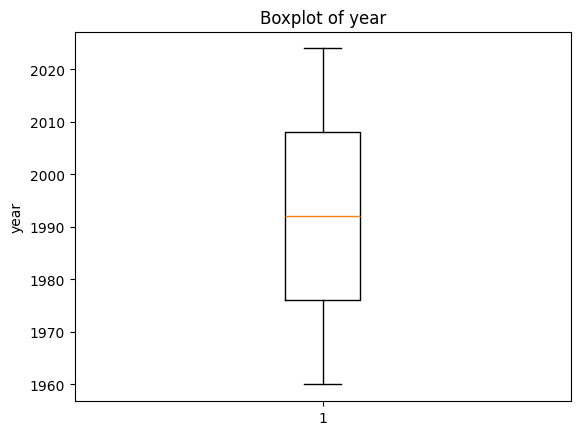

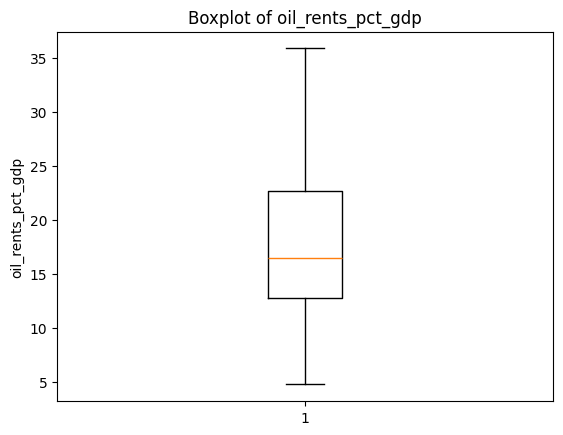

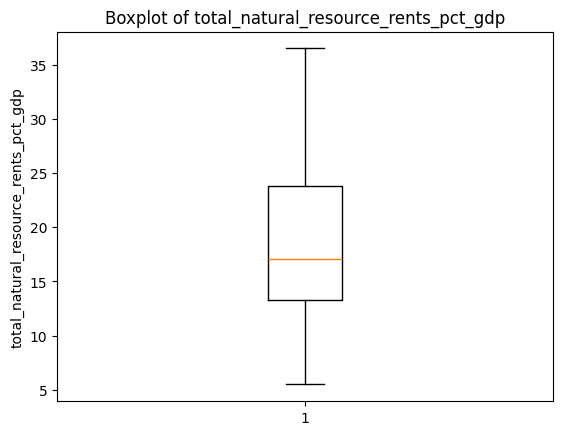

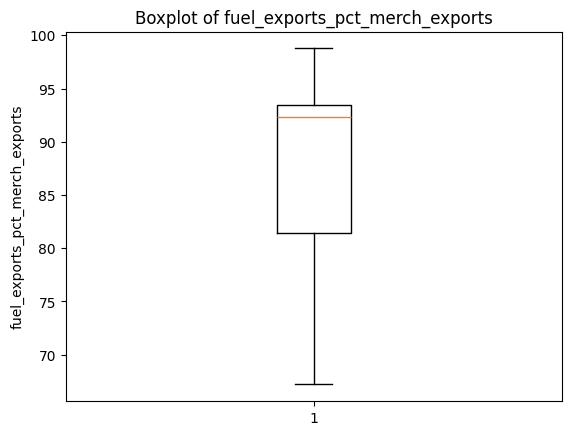

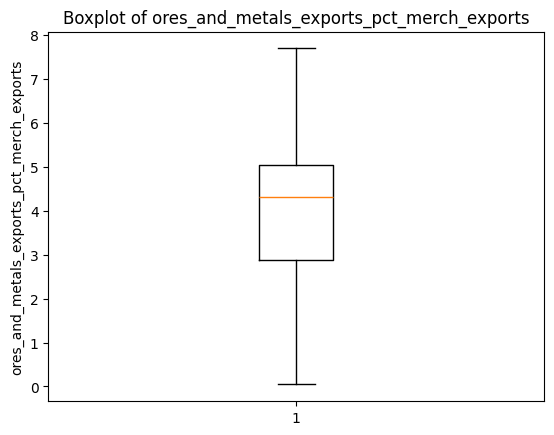

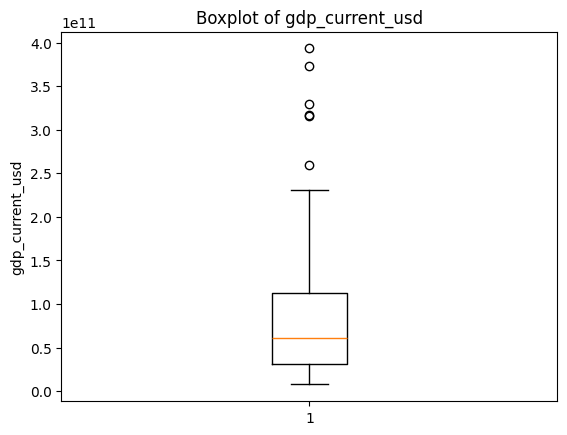

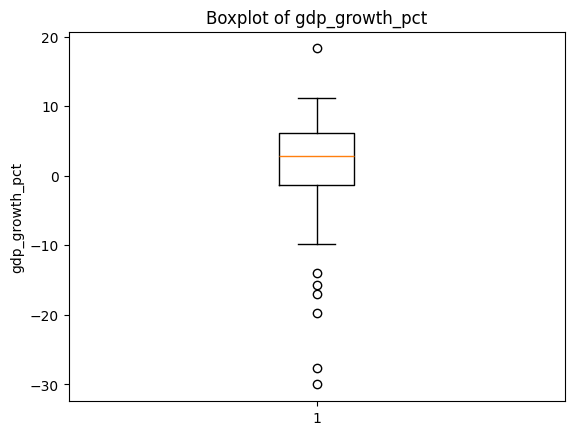

In [10]:
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

In [11]:
df_clean = df.copy()

for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_clean = df_clean[
        (df_clean[col] >= lower_bound) &
        (df_clean[col] <= upper_bound)
    ]

print("Shape after outlier removal:", df_clean.shape)

Shape after outlier removal: (32, 8)


In [12]:
correlation_matrix = df_clean[numeric_cols].corr()

print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
                                               year  oil_rents_pct_gdp  \
year                                       1.000000           0.130114   
oil_rents_pct_gdp                          0.130114           1.000000   
total_natural_resource_rents_pct_gdp       0.138075           0.999692   
fuel_exports_pct_merch_exports            -0.646207           0.283287   
ores_and_metals_exports_pct_merch_exports -0.021696          -0.336747   
gdp_current_usd                            0.878182           0.247908   
gdp_growth_pct                            -0.055054          -0.079199   

                                           total_natural_resource_rents_pct_gdp  \
year                                                                   0.138075   
oil_rents_pct_gdp                                                      0.999692   
total_natural_resource_rents_pct_gdp                                   1.000000   
fuel_exports_pct_merch_exports                         

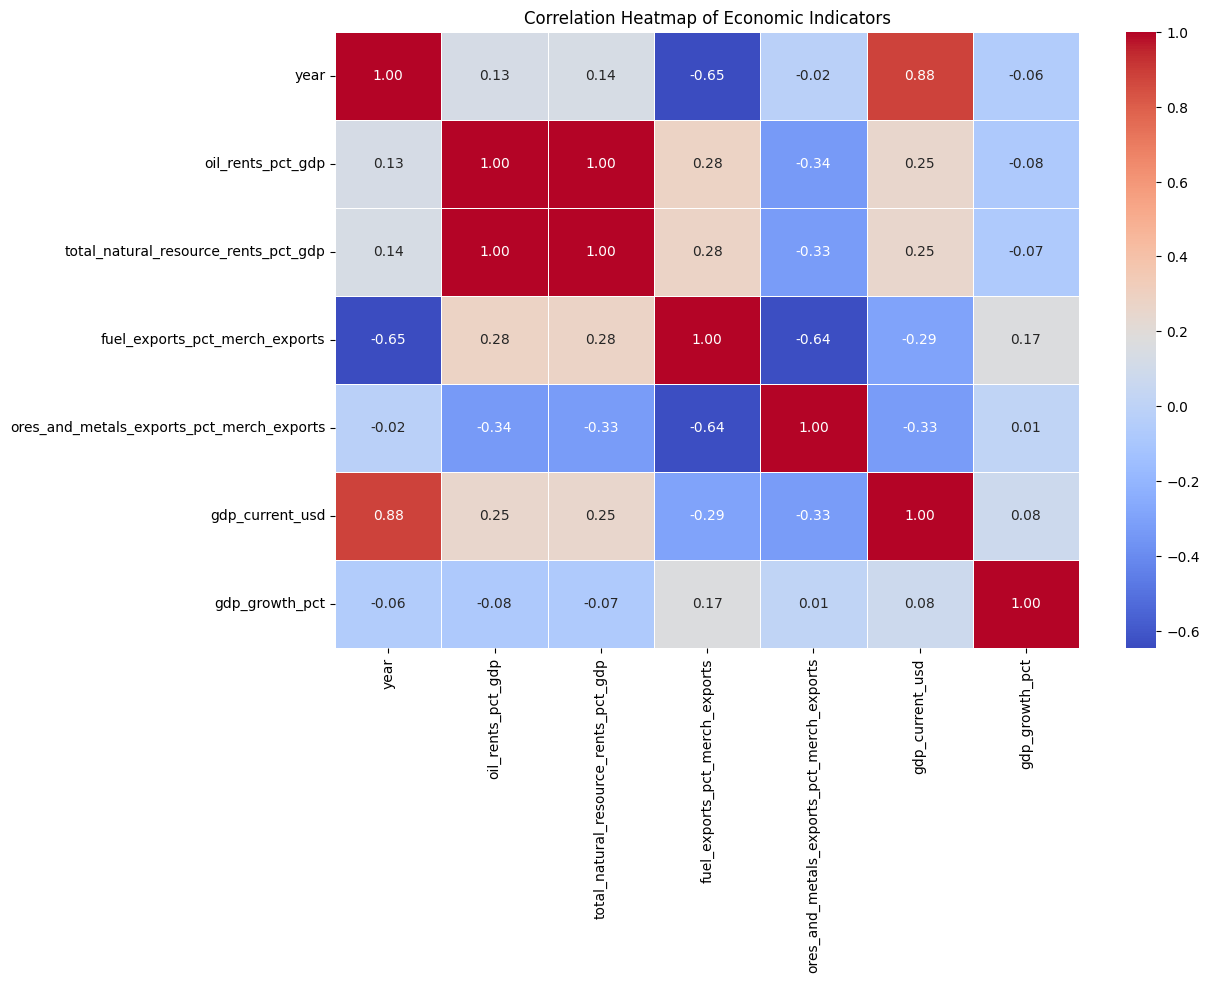

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_matrix = df_clean.select_dtypes(include="number").corr()
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5
)
plt.title("Correlation Heatmap of Economic Indicators")
plt.show()

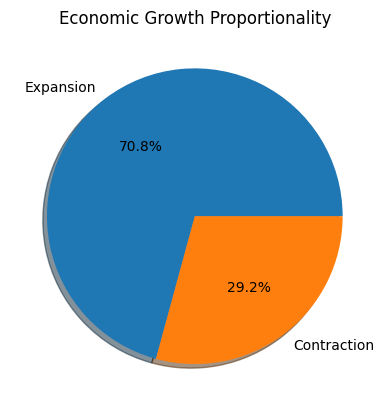

In [16]:
import matplotlib.pyplot as plt

df['Diabetes_Outcome'] = df['class'].apply(lambda x: 'Positive' if x == 1 else 'Negative')

outcome_counts = df['Diabetes_Outcome'].value_counts()

plt.figure()
plt.pie(
    outcome_counts,
    labels=outcome_counts.index,
    autopct='%.1f%%',
    shadow=True
)
plt.title('Diabetes Outcome Proportionality')
plt.show()

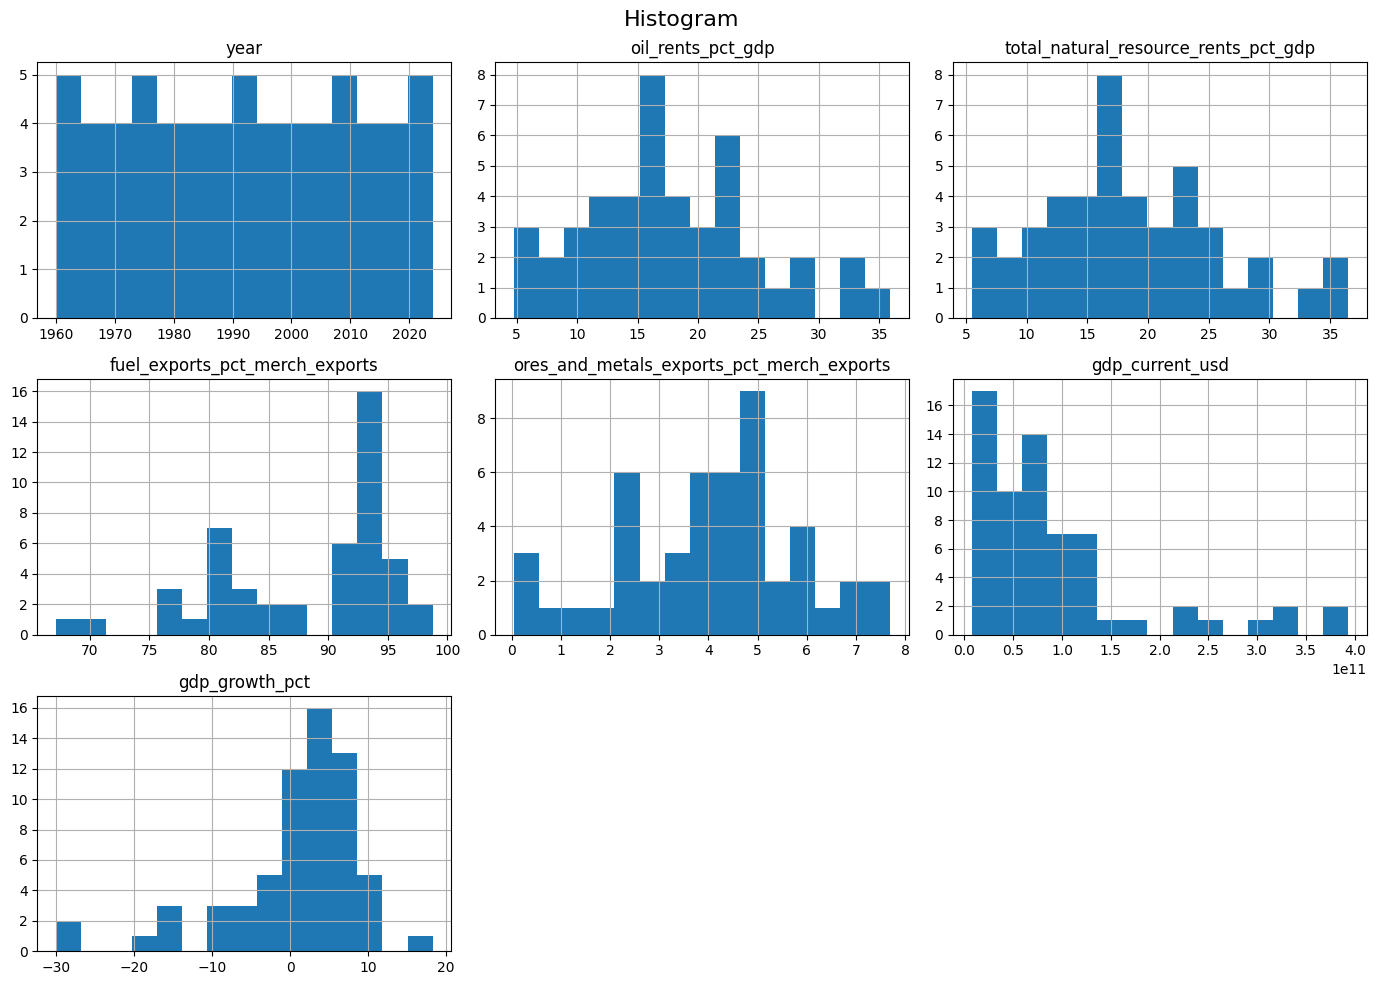

In [18]:
df[numeric_cols].hist(
    bins=15,
    figsize=(14, 10)
)

plt.suptitle("Histogram", fontsize=16)
plt.tight_layout()
plt.show()
